In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


This is to get the data folder zip file and unzip it. Replace  the path with the one that is relavant to yours. You don't need to run this command if you already have the files.The notebook assumes that there is a data folder in which there is a public.csv file and another folder named 'raw'. This folder should contain respective class image folders. If your directory structure is different than this, make sure you enter the corresponding paths in the code.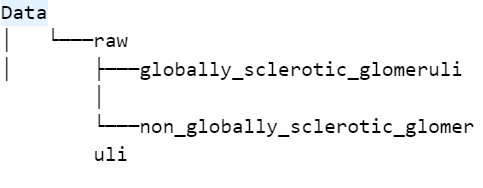

In [2]:
!unzip /content/drive/MyDrive/CMIL-classify/Data.zip -d /content/Project_CMIL


Streaming output truncated to the last 5000 lines.
 extracting: /content/Project_CMIL/public/non_globally_sclerotic_glomeruli/18-162_PAS_5of6_64551c0e435c92704a3a9c4f.png  
 extracting: /content/Project_CMIL/public/non_globally_sclerotic_glomeruli/18-162_PAS_5of6_64551c0e435c92704a3a9c52.png  
 extracting: /content/Project_CMIL/public/non_globally_sclerotic_glomeruli/18-162_PAS_5of6_64551c0e435c92704a3a9c5c.png  
 extracting: /content/Project_CMIL/public/non_globally_sclerotic_glomeruli/18-162_PAS_6of6_64551c16435c92704a3aaf17.png  
 extracting: /content/Project_CMIL/public/non_globally_sclerotic_glomeruli/18-162_PAS_6of6_64551c16435c92704a3aaf1f.png  
 extracting: /content/Project_CMIL/public/non_globally_sclerotic_glomeruli/18-162_PAS_6of6_64551c16435c92704a3aaf21.png  
 extracting: /content/Project_CMIL/public/non_globally_sclerotic_glomeruli/18-162_PAS_6of6_64551c16435c92704a3aaf34.png  
 extracting: /content/Project_CMIL/public/non_globally_sclerotic_glomeruli/18-162_PAS_6of6_6455

# **Visualize raw dataset proportion**

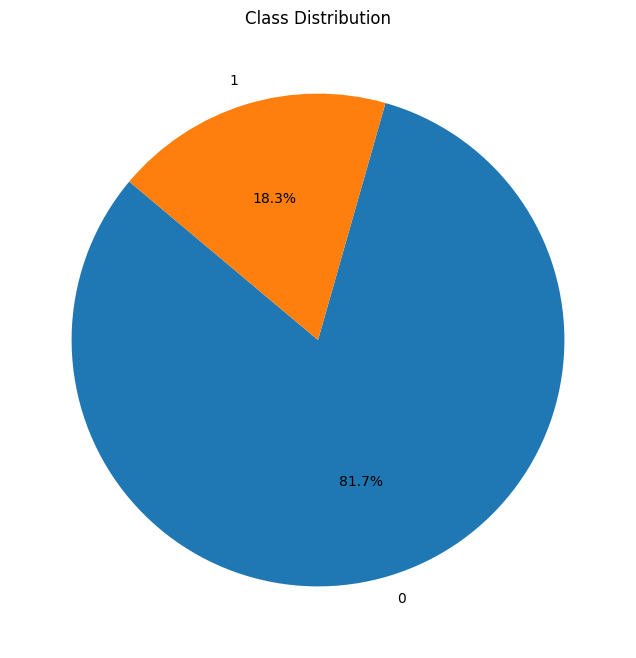

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
raw_data = pd.read_csv('/content/Project_CMIL/data/public.csv')

# Count the occurrences of each class
class_counts = raw_data['ground truth'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Class Distribution')
plt.show()

In [5]:
class_counts

ground truth
0    4704
1    1054
Name: count, dtype: int64

In [6]:
raw_data

,name,ground truth
0,S-2006-005094_PAS_1of2_64552732435c92704a3d37c...,0
1,S-2006-005094_PAS_1of2_64552732435c92704a3d37c...,0
2,S-2006-005094_PAS_1of2_64552732435c92704a3d37c...,0
3,S-2006-005094_PAS_1of2_64552732435c92704a3d37c...,0
4,S-2006-005094_PAS_1of2_64552732435c92704a3d37d...,0
...,...,...
5753,S-2001-019413_PAS_1of2_64762d5a435c92704a44caf...,1
5754,S-2001-019413_PAS_1of2_64762d5a435c92704a44caf...,1
5755,S-2001-019413_PAS_1of2_64762d5a435c92704a44caf...,1
5756,S-2001-019413_PAS_1of2_64762d5a435c92704a44caf...,1


## **Split the Test dataset**

**1. Make Non_globally_sclerotic_glomeruli test set**

In [8]:
import os
import shutil
import random

# Define the source and destination directories
source_dir = '/content/Project_CMIL/data/raw/non_globally_sclerotic_glomeruli'
destination_dir = '/content/Project_CMIL/data/test/non_globally_sclerotic_glomeruli'

# Create the destination directory if it doesn't exist
if not os.path.exists(destination_dir):
    os.makedirs(destination_dir)

# List all files in the source directory
files = os.listdir(source_dir)

# Filter to include only files (in case there are subdirectories)
files = [f for f in files if os.path.isfile(os.path.join(source_dir, f))]

# Calculate 15% of the total number of files
num_files_to_move = int(0.15 * len(files))

# Randomly select 15% of the files
files_to_move = random.sample(files, num_files_to_move)

# Move the selected files to the destination directory
for file in files_to_move:
    shutil.move(os.path.join(source_dir, file), os.path.join(destination_dir, file))

print(f'Moved {num_files_to_move} files from {source_dir} to {destination_dir}')

test_df_1 = raw_data[raw_data['name'].isin(files_to_move)]

# Remove these records from raw_data
raw_data = raw_data[~raw_data['name'].isin(files_to_move)]

Moved 705 files from /content/Project_CMIL/data/raw/non_globally_sclerotic_glomeruli to /content/Project_CMIL/data/test/non_globally_sclerotic_glomeruli


In [9]:
test_df_1

,name,ground truth
1,S-2006-005094_PAS_1of2_64552732435c92704a3d37c...,0
2,S-2006-005094_PAS_1of2_64552732435c92704a3d37c...,0
15,S-2006-005094_PAS_1of2_64552732435c92704a3d37d...,0
17,S-2006-005094_PAS_1of2_64552732435c92704a3d37e...,0
18,S-2006-005094_PAS_1of2_64552732435c92704a3d37e...,0
...,...,...
5655,S-2006-005046_PAS_2of2_6454334d435c92704a395ff...,0
5667,S-2006-005047_PAS_1of2_64543354435c92704a396fc...,0
5673,S-2006-005093_PAS_2of2_64543359435c92704a397a5...,0
5715,S-2006-002138_PAS_2of2_64762d5f435c92704a44d6c...,0


**2. Make globally_sclerotic_glomeruli test set**

In [10]:
import os
import shutil
import random

# Define the source and destination directories
source_dir = '/content/Project_CMIL/data/raw/globally_sclerotic_glomeruli'
destination_dir = '/content/Project_CMIL/data/test/globally_sclerotic_glomeruli'

# Create the destination directory if it doesn't exist
if not os.path.exists(destination_dir):
    os.makedirs(destination_dir)

# List all files in the source directory
files = os.listdir(source_dir)

# Filter to include only files (in case there are subdirectories)
files = [f for f in files if os.path.isfile(os.path.join(source_dir, f))]

# Calculate 15% of the total number of files
num_files_to_move = int(0.15 * len(files))

# Randomly select 15% of the files
files_to_move = random.sample(files, num_files_to_move)

# Move the selected files to the destination directory
for file in files_to_move:
    shutil.move(os.path.join(source_dir, file), os.path.join(destination_dir, file))

print(f'Moved {num_files_to_move} files from {source_dir} to {destination_dir}')

test_df_2 = raw_data[raw_data['name'].isin(files_to_move)]

# Remove these records from raw_data
raw_data = raw_data[~raw_data['name'].isin(files_to_move)]

Moved 158 files from /content/Project_CMIL/data/raw/globally_sclerotic_glomeruli to /content/Project_CMIL/data/test/globally_sclerotic_glomeruli


In [11]:
test_df_2

,name,ground truth
23,S-2006-005094_PAS_1of2_64552733435c92704a3d37e...,1
24,S-2006-005094_PAS_1of2_64552733435c92704a3d37e...,1
25,S-2006-005094_PAS_1of2_64552733435c92704a3d37e...,1
26,S-2006-005094_PAS_1of2_64552733435c92704a3d37e...,1
32,S-2006-005094_PAS_1of2_64552733435c92704a3d37f...,1
...,...,...
5701,S-2006-005093_PAS_2of2_6454335a435c92704a397a7...,1
5703,S-2006-005093_PAS_2of2_6454335a435c92704a397a8...,1
5709,S-2006-005093_PAS_2of2_6454335a435c92704a397a8...,1
5710,S-2006-005093_PAS_2of2_6454335a435c92704a397a8...,1


In [12]:
test_df = pd.concat([test_df_1, test_df_2], axis=0)

In [13]:
test_df

,name,ground truth
1,S-2006-005094_PAS_1of2_64552732435c92704a3d37c...,0
2,S-2006-005094_PAS_1of2_64552732435c92704a3d37c...,0
15,S-2006-005094_PAS_1of2_64552732435c92704a3d37d...,0
17,S-2006-005094_PAS_1of2_64552732435c92704a3d37e...,0
18,S-2006-005094_PAS_1of2_64552732435c92704a3d37e...,0
...,...,...
5701,S-2006-005093_PAS_2of2_6454335a435c92704a397a7...,1
5703,S-2006-005093_PAS_2of2_6454335a435c92704a397a8...,1
5709,S-2006-005093_PAS_2of2_6454335a435c92704a397a8...,1
5710,S-2006-005093_PAS_2of2_6454335a435c92704a397a8...,1


In [14]:
test_df.to_csv('/content/Project_CMIL/data/test.csv')

In [15]:
raw_data

,name,ground truth
0,S-2006-005094_PAS_1of2_64552732435c92704a3d37c...,0
3,S-2006-005094_PAS_1of2_64552732435c92704a3d37c...,0
4,S-2006-005094_PAS_1of2_64552732435c92704a3d37d...,0
5,S-2006-005094_PAS_1of2_64552732435c92704a3d37d...,0
6,S-2006-005094_PAS_1of2_64552732435c92704a3d37d...,0
...,...,...
5752,S-2001-019413_PAS_1of2_64762d5a435c92704a44caf...,1
5753,S-2001-019413_PAS_1of2_64762d5a435c92704a44caf...,1
5755,S-2001-019413_PAS_1of2_64762d5a435c92704a44caf...,1
5756,S-2001-019413_PAS_1of2_64762d5a435c92704a44caf...,1


In [16]:
class_counts = raw_data['ground truth'].value_counts()
class_counts


ground truth
0    3999
1     896
Name: count, dtype: int64

In [19]:
raw_data.to_csv('/content/Project_CMIL/data/public.csv')

# **Synthetically generate new minority samples using SMOTE technique**

In [23]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
import timeit
# from tensorflow.keras.preprocessing.image import img_to_array, load_img
import os

device_name = tf.test.gpu_device_name()
# Load the CSV file
raw_data = pd.read_csv('/content/Project_CMIL/data/public.csv')
print(raw_data)

def save_image(img_array, path):
    img = tf.keras.preprocessing.image.array_to_img(img_array)
    img.save(path)

def get_image_path(row):
    if row['ground truth'] == 0:
        return f'/content/Project_CMIL/data/raw/non_globally_sclerotic_glomeruli/{row["name"]}'
    else:
        return f'/content/Project_CMIL/data/raw/globally_sclerotic_glomeruli/{row["name"]}'
# Function to load images and convert them to arrays
def load_images(df):
    images = []
    labels = []
    for index, row in df.iterrows():
        img_path = get_image_path(row)
        if device_name != '/device:GPU:0':
          img = load_img(img_path, target_size=(224, 224))  # Resize images if needed
          img_array = img_to_array(img)
        else:
          img_array = gpu(img_path)

        images.append(img_array)
        labels.append(row['ground truth'])
        print('iter ',index)
    return np.array(images), np.array(labels)

def gpu(img_path):
  with tf.device('/device:GPU:0'):
    # print('Using GPU to load images')
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))  # Resize images if needed
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    return img_array

sampling_strategy_float = 0.5
if device_name != '/device:GPU:0':
  # Load images and labels
  X, y = load_images(raw_data)

  # Flatten images for SMOTE
  X_flattened = X.reshape(X.shape[0], -1)

  # Apply SMOTE
  smote = SMOTE(sampling_strategy=sampling_strategy_float, random_state=42)  # Adjust the ratio as needed
  X_smote, y_smote = smote.fit_resample(X_flattened, y)

  # Reshape back to the original image shape
  X_smote = X_smote.reshape(X_smote.shape[0], 224, 224, 3)
  synthetic_samples = X_smote[len(X):]
  print("SMOTE applied. Number of samples after SMOTE:", len(X_smote))
else:
  with tf.device('/device:GPU:0'):
    print('USING GPU FOR SMOTE')
    # Load images and labels
    X, y = load_images(raw_data)

    # Flatten images for SMOTE
    X_flattened = X.reshape(X.shape[0], -1)

    # Apply SMOTE
    smote = SMOTE(sampling_strategy=sampling_strategy_float, random_state=42)  # Adjust the ratio as needed
    X_smote, y_smote = smote.fit_resample(X_flattened, y)

    # Reshape back to the original image shape
    X_smote = X_smote.reshape(X_smote.shape[0], 224, 224, 3)
    synthetic_samples = X_smote[len(X):]
    print("SMOTE applied. Number of samples after SMOTE:", len(X_smote))


      Unnamed: 0                                               name  \
0              3  S-2006-005094_PAS_1of2_64552732435c92704a3d37c...   
1              4  S-2006-005094_PAS_1of2_64552732435c92704a3d37d...   
2              5  S-2006-005094_PAS_1of2_64552732435c92704a3d37d...   
3             13  S-2006-005094_PAS_1of2_64552732435c92704a3d37d...   
4             16  S-2006-005094_PAS_1of2_64552732435c92704a3d37d...   
...          ...                                                ...   
2091        5752  S-2001-019413_PAS_1of2_64762d5a435c92704a44caf...   
2092        5753  S-2001-019413_PAS_1of2_64762d5a435c92704a44caf...   
2093        5755  S-2001-019413_PAS_1of2_64762d5a435c92704a44caf...   
2094        5756  S-2001-019413_PAS_1of2_64762d5a435c92704a44caf...   
2095        5757  S-2001-019413_PAS_1of2_64762d5a435c92704a44caf...   

      ground truth  
0                0  
1                0  
2                0  
3                0  
4                0  
...            ...  


In [24]:
len(X), len(X_smote)

(2096, 2124)

In [25]:
import numpy as np

# Count the number of 0's and 1's
unique, counts = np.unique(y_smote, return_counts=True)
count_dict = dict(zip(unique, counts))

# Output the number of 0's and 1's
print(f"Number of 0's: {count_dict.get(0, 0)}")
print(f"Number of 1's: {count_dict.get(1, 0)}")

Number of 0's: 1200
Number of 1's: 924


**Saving a few synthetic samples in one folder**

In [26]:
from tensorflow.keras.preprocessing.image import array_to_img, save_img
import os, shutil
device_name = tf.test.gpu_device_name()
def clear_or_create_dir(dir_path):
    if os.path.exists(dir_path):
        shutil.rmtree(dir_path)  # Delete the directory and its contents
    os.makedirs(dir_path)

# Save SMOTE-generated images to respective class folders and update CSV
clear_or_create_dir('/content/Project_CMIL/data/few_synthesized_samples')
dir = '/content/Project_CMIL/data/few_synthesized_samples'
if device_name != '/device:GPU:0':
    for i in range(len(synthetic_samples)):
        img = array_to_img(synthetic_samples[i])
        img_name = f'smote_{i}.png'
        img_path = os.path.join(dir, img_name)
        save_img(img_path, img)
else:
  with tf.device('/device:GPU:0'):
    print('USING GPU TO SAVE SMOTE IMAGES')
    for i in range(len(synthetic_samples)):
        print('iter',i)
        img = array_to_img(synthetic_samples[i])
        img_name = f'smote_{i}.png'
        img_path = os.path.join(dir, img_name)
        save_img(img_path, img)

USING GPU TO SAVE SMOTE IMAGES
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14
iter 15
iter 16
iter 17
iter 18
iter 19
iter 20
iter 21
iter 22
iter 23
iter 24
iter 25
iter 26
iter 27


# **Saving SMOTE images**

In [27]:
from tensorflow.keras.preprocessing.image import array_to_img, save_img
import os, shutil
device_name = tf.test.gpu_device_name()
def clear_or_create_dir(dir_path):
    if os.path.exists(dir_path):
        shutil.rmtree(dir_path)  # Delete the directory and its contents
    os.makedirs(dir_path)

# Save SMOTE-generated images to respective class folders and update CSV
clear_or_create_dir('/content/Project_CMIL/data/after_smote')
print('New data directory created to save SMOTE files')
smote_image_dir = '/content/Project_CMIL/data/after_smote'
new_entries = []



clear_or_create_dir(os.path.join(smote_image_dir, 'globally_sclerotic_glomeruli'))
clear_or_create_dir(os.path.join(smote_image_dir, 'non_globally_sclerotic_glomeruli'))


if device_name != '/device:GPU:0':
    for i in range(len(X_smote)):
        img = array_to_img(X_smote[i])
        label = y_smote[i]
        class_folder = 'globally_sclerotic_glomeruli' if label == 1 else 'non_globally_sclerotic_glomeruli'
        img_name = f'image_{i}.png'
        img_path = os.path.join(smote_image_dir, class_folder, img_name)
        save_img(img_path, img)
        new_entries.append({'name': img_name, 'ground truth': label})
else:
  with tf.device('/device:GPU:0'):
    print('USING GPU TO SAVE SMOTE IMAGES')
    for i in range(len(X_smote)):
          print('iter ',i)
          img = array_to_img(X_smote[i])
          label = y_smote[i]
          class_folder = 'globally_sclerotic_glomeruli' if label == 1 else 'non_globally_sclerotic_glomeruli'
          img_name = f'image_{i}.png'
          img_path = os.path.join(smote_image_dir, class_folder, img_name)
          save_img(img_path, img)
          new_entries.append({'name': img_name, 'ground truth': label})

# Append new entries to the CSV file
new_data_after_smote = pd.DataFrame(new_entries)



New data directory created to save SMOTE files
USING GPU TO SAVE SMOTE IMAGES
iter  0
iter  1
iter  2
iter  3
iter  4
iter  5
iter  6
iter  7
iter  8
iter  9
iter  10
iter  11
iter  12
iter  13
iter  14
iter  15
iter  16
iter  17
iter  18
iter  19
iter  20
iter  21
iter  22
iter  23
iter  24
iter  25
iter  26
iter  27
iter  28
iter  29
iter  30
iter  31
iter  32
iter  33
iter  34
iter  35
iter  36
iter  37
iter  38
iter  39
iter  40
iter  41
iter  42
iter  43
iter  44
iter  45
iter  46
iter  47
iter  48
iter  49
iter  50
iter  51
iter  52
iter  53
iter  54
iter  55
iter  56
iter  57
iter  58
iter  59
iter  60
iter  61
iter  62
iter  63
iter  64
iter  65
iter  66
iter  67
iter  68
iter  69
iter  70
iter  71
iter  72
iter  73
iter  74
iter  75
iter  76
iter  77
iter  78
iter  79
iter  80
iter  81
iter  82
iter  83
iter  84
iter  85
iter  86
iter  87
iter  88
iter  89
iter  90
iter  91
iter  92
iter  93
iter  94
iter  95
iter  96
iter  97
iter  98
iter  99
iter  100
iter  101
iter  102
it

In [28]:
new_data_after_smote

,name,ground truth
0,image_0.png,0
1,image_1.png,0
2,image_2.png,0
3,image_3.png,0
4,image_4.png,0
...,...,...
2119,image_2119.png,1
2120,image_2120.png,1
2121,image_2121.png,1
2122,image_2122.png,1


# **Visualize new dataset proportions after SMOTE**

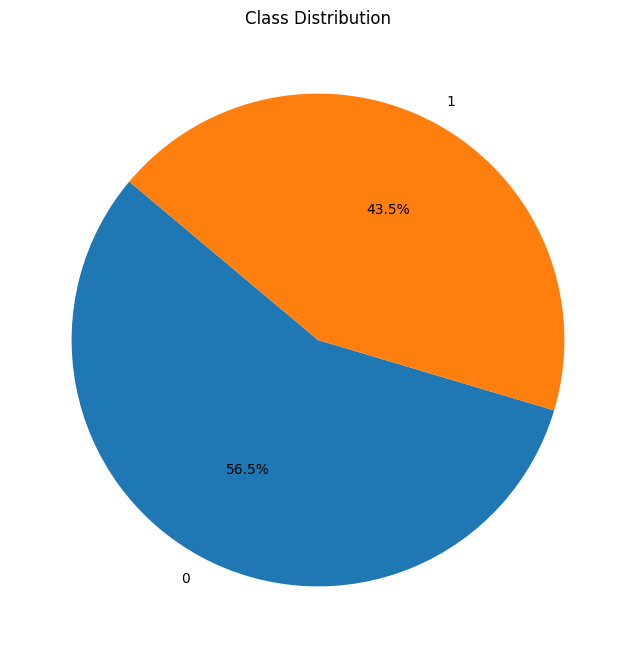

In [29]:
# Count the occurrences of each class
class_counts = new_data_after_smote['ground truth'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Class Distribution')
plt.show()

In [30]:
new_data_after_smote.to_csv('/content/Project_CMIL/data/after_smote.csv', index=False)

print("SMOTE-generated images saved and public.csv updated.")

SMOTE-generated images saved and public.csv updated.


# **Data Augmentation**

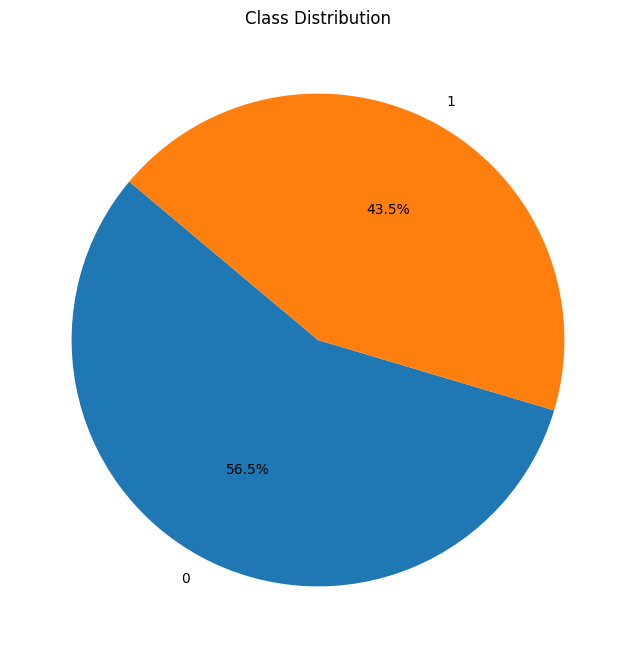

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
data = pd.read_csv('/content/Project_CMIL/data/after_smote.csv')

# Count the occurrences of each class
class_counts = data['ground truth'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Class Distribution')
plt.show()

**Load Dataset including SMOTE images**

In [32]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, save_img
import shutil
device_name = tf.test.gpu_device_name()
# Load the updated CSV file
data_after_smote = pd.read_csv('/content/Project_CMIL/data/after_smote.csv')

def get_image_path(row):
    if row['ground truth'] == 0:
        return f'/content/Project_CMIL/data/after_smote/non_globally_sclerotic_glomeruli/{row["name"]}'
    else:
        return f'/content/Project_CMIL/data/after_smote/globally_sclerotic_glomeruli/{row["name"]}'

# Function to load images and convert them to arrays
def load_images(df):
    images = []
    labels = []
    if device_name != '/device:GPU:0':
      for index, row in df.iterrows():
          img_path = get_image_path(row)
          img = load_img(img_path, target_size=(224, 224))  # Resize images if needed
          img_array = img_to_array(img)
          images.append(img_array)
          labels.append(row['ground truth'])
    else:
      with tf.device('/device:GPU:0'):
        print('USING GPU TO LOAD IMAGES')
        for index, row in df.iterrows():
          print('iter ', index)
          img_path = get_image_path(row)
          img = load_img(img_path, target_size=(224, 224))  # Resize images if needed
          img_array = img_to_array(img)
          images.append(img_array)
          labels.append(row['ground truth'])
    return np.array(images), np.array(labels)

# Load images and labels
X, y = load_images(data_after_smote)

# Calculate the number of images needed for augmentation
class_counts = data_after_smote['ground truth'].value_counts()
num_augmented_samples = (class_counts[0] - class_counts[1])
print('class counts')
print(class_counts)
print('new_augmented_samples')
print(num_augmented_samples)


USING GPU TO LOAD IMAGES
iter  0
iter  1
iter  2
iter  3
iter  4
iter  5
iter  6
iter  7
iter  8
iter  9
iter  10
iter  11
iter  12
iter  13
iter  14
iter  15
iter  16
iter  17
iter  18
iter  19
iter  20
iter  21
iter  22
iter  23
iter  24
iter  25
iter  26
iter  27
iter  28
iter  29
iter  30
iter  31
iter  32
iter  33
iter  34
iter  35
iter  36
iter  37
iter  38
iter  39
iter  40
iter  41
iter  42
iter  43
iter  44
iter  45
iter  46
iter  47
iter  48
iter  49
iter  50
iter  51
iter  52
iter  53
iter  54
iter  55
iter  56
iter  57
iter  58
iter  59
iter  60
iter  61
iter  62
iter  63
iter  64
iter  65
iter  66
iter  67
iter  68
iter  69
iter  70
iter  71
iter  72
iter  73
iter  74
iter  75
iter  76
iter  77
iter  78
iter  79
iter  80
iter  81
iter  82
iter  83
iter  84
iter  85
iter  86
iter  87
iter  88
iter  89
iter  90
iter  91
iter  92
iter  93
iter  94
iter  95
iter  96
iter  97
iter  98
iter  99
iter  100
iter  101
iter  102
iter  103
iter  104
iter  105
iter  106
iter  107
iter 

# **Oversample the remaining minority by data augmentation**

In [33]:
# Define the data augmentation generator
datagen = ImageDataGenerator(
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='constant',
    cval=0
)


In [34]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

device_name = tf.test.gpu_device_name()

# Convert X and y to NumPy arrays if they are not already
X = np.array(X)
y = np.array(y)

# Select the globally sclerotic glomeruli images and their indices
sclerotic_indices = np.where(y == 1)[0]
sclerotic_images = X[sclerotic_indices]

batch_size = 1
# Create an empty list to store augmented images and labels
augmented_images = []
augmented_labels = []
iter_limit = num_augmented_samples
# Generate augmented images in batches
if device_name != '/device:GPU:0':
  for i in range(0, len(sclerotic_images), batch_size):
    if i>iter_limit:
        break
    print('iter ', i)
    batch_images = sclerotic_images[i:i + 1]
    batch_images = batch_images.reshape((-1,) + sclerotic_images.shape[1:])
    augment_iter = datagen.flow(batch_images, batch_size=batch_size)

    for _ in range(1):
      aug_batch = next(augment_iter)
      augmented_images.extend(aug_batch)
      augmented_labels.extend([1] * len(aug_batch))
else:
  with tf.device('/device:GPU:0'):
    print('USING GPU TO AUGMENT IMAGES')
    for i in range(0, len(sclerotic_images), batch_size):
      if i>iter_limit:
        break
      print('iter ', i)
      batch_images = sclerotic_images[i:i + 1]
      batch_images = batch_images.reshape((-1,) + sclerotic_images.shape[1:])
      augment_iter = datagen.flow(batch_images, batch_size=batch_size)

      for _ in range(1):
        aug_batch = next(augment_iter)
        augmented_images.extend(aug_batch)
        augmented_labels.extend([1] * len(aug_batch))

# Convert augmented images and labels to NumPy arrays
augmented_images = np.array(augmented_images)
augmented_labels = np.array(augmented_labels)

print("Augmentation complete. Number of augmented samples:", len(augmented_images))


USING GPU TO AUGMENT IMAGES
iter  0
iter  1
iter  2
iter  3
iter  4
iter  5
iter  6
iter  7
iter  8
iter  9
iter  10
iter  11
iter  12
iter  13
iter  14
iter  15
iter  16
iter  17
iter  18
iter  19
iter  20
iter  21
iter  22
iter  23
iter  24
iter  25
iter  26
iter  27
iter  28
iter  29
iter  30
iter  31
iter  32
iter  33
iter  34
iter  35
iter  36
iter  37
iter  38
iter  39
iter  40
iter  41
iter  42
iter  43
iter  44
iter  45
iter  46
iter  47
iter  48
iter  49
iter  50
iter  51
iter  52
iter  53
iter  54
iter  55
iter  56
iter  57
iter  58
iter  59
iter  60
iter  61
iter  62
iter  63
iter  64
iter  65
iter  66
iter  67
iter  68
iter  69
iter  70
iter  71
iter  72
iter  73
iter  74
iter  75
iter  76
iter  77
iter  78
iter  79
iter  80
iter  81
iter  82
iter  83
iter  84
iter  85
iter  86
iter  87
iter  88
iter  89
iter  90
iter  91
iter  92
iter  93
iter  94
iter  95
iter  96
iter  97
iter  98
iter  99
iter  100
iter  101
iter  102
iter  103
iter  104
iter  105
iter  106
iter  107
it

**Saving Augmented Images**

In [35]:
image_folder = '/content/Project_CMIL/data/after_augmentation'
def clear_or_create_dir(dir_path):
    if os.path.exists(dir_path):
        shutil.rmtree(dir_path)  # Delete the directory and its contents
    os.makedirs(dir_path)  # Create the directory

clear_or_create_dir('/content/Project_CMIL/data/after_augmentation')
# Clear or create directories for augmented images
clear_or_create_dir(os.path.join(image_folder, 'globally_sclerotic_glomeruli'))
clear_or_create_dir(os.path.join(image_folder, 'non_globally_sclerotic_glomeruli'))
clear_or_create_dir('/content/Project_CMIL/data/sample_augmented_images')

In [36]:
augmented_image_dir = '/content/Project_CMIL/data/after_augmentation'
# final_images = augmented_images + sclerotic_images
new_entries = []
aug_limit=10
if device_name != '/device:GPU:0':
  for i, aug_img in enumerate(augmented_images):
    print('iter ', i)
    img_name = f'aug_{i}.png'
    img_path = os.path.join(augmented_image_dir, 'globally_sclerotic_glomeruli', img_name)
    save_img(img_path, aug_img)
    new_entries.append({'name': img_name, 'ground truth': 1})
else:
  with tf.device('/device:GPU:0'):
    print('USING GPU TO SAVE IMAGES')
    for i, aug_img in enumerate(augmented_images):
      print('iter ', i)
      img_name = f'aug_{i}.png'
      img_path = os.path.join(augmented_image_dir, 'globally_sclerotic_glomeruli', img_name)
      save_img(img_path, aug_img)
      new_entries.append({'name': img_name, 'ground truth': 1})
      if i<aug_limit:
        img_name = f'aug_{i}.png'
        img_path = os.path.join('/content/Project_CMIL/data/sample_augmented_images', img_name)
        save_img(img_path, aug_img)

if device_name != '/device:GPU:0':
  for i, aug_img in enumerate(sclerotic_images):
    print('iter ', i)
    img_name = f'aug_{i}.png'
    img_path = os.path.join(augmented_image_dir, 'globally_sclerotic_glomeruli', img_name)
    save_img(img_path, aug_img)
    new_entries.append({'name': img_name, 'ground truth': 1})
else:
  with tf.device('/device:GPU:0'):
    print('USING GPU TO SAVE IMAGES')
    for i, aug_img in enumerate(sclerotic_images):
      print('iter ', i)
      img_name = f'aug_{i}.png'
      img_path = os.path.join(augmented_image_dir, 'globally_sclerotic_glomeruli', img_name)
      save_img(img_path, aug_img)
      new_entries.append({'name': img_name, 'ground truth': 1})

# Append new entries to the CSV file
new_aug_df = pd.DataFrame(new_entries)

USING GPU TO SAVE IMAGES
iter  0
iter  1
iter  2
iter  3
iter  4
iter  5
iter  6
iter  7
iter  8
iter  9
iter  10
iter  11
iter  12
iter  13
iter  14
iter  15
iter  16
iter  17
iter  18
iter  19
iter  20
iter  21
iter  22
iter  23
iter  24
iter  25
iter  26
iter  27
iter  28
iter  29
iter  30
iter  31
iter  32
iter  33
iter  34
iter  35
iter  36
iter  37
iter  38
iter  39
iter  40
iter  41
iter  42
iter  43
iter  44
iter  45
iter  46
iter  47
iter  48
iter  49
iter  50
iter  51
iter  52
iter  53
iter  54
iter  55
iter  56
iter  57
iter  58
iter  59
iter  60
iter  61
iter  62
iter  63
iter  64
iter  65
iter  66
iter  67
iter  68
iter  69
iter  70
iter  71
iter  72
iter  73
iter  74
iter  75
iter  76
iter  77
iter  78
iter  79
iter  80
iter  81
iter  82
iter  83
iter  84
iter  85
iter  86
iter  87
iter  88
iter  89
iter  90
iter  91
iter  92
iter  93
iter  94
iter  95
iter  96
iter  97
iter  98
iter  99
iter  100
iter  101
iter  102
iter  103
iter  104
iter  105
iter  106
iter  107
iter 

In [41]:
new_aug_df

,name,ground truth
0,aug_0.png,1
1,aug_1.png,1
2,aug_2.png,1
3,aug_3.png,1
4,aug_4.png,1
...,...,...
1196,aug_919.png,1
1197,aug_920.png,1
1198,aug_921.png,1
1199,aug_922.png,1


In [42]:
data


,name,ground truth
0,image_0.png,0
1,image_1.png,0
2,image_2.png,0
3,image_3.png,0
4,image_4.png,1
...,...,...
2119,image_2119.png,1
2120,image_2120.png,1
2121,image_2121.png,1
2122,image_2122.png,1


In [43]:
filtered_data = data[data['ground truth'] != 1]

result_df = pd.concat([filtered_data, new_aug_df], ignore_index=True)

In [44]:
result_df

,name,ground truth
0,image_0.png,0
1,image_1.png,0
2,image_2.png,0
3,image_3.png,0
4,image_22.png,0
...,...,...
2396,aug_919.png,1
2397,aug_920.png,1
2398,aug_921.png,1
2399,aug_922.png,1


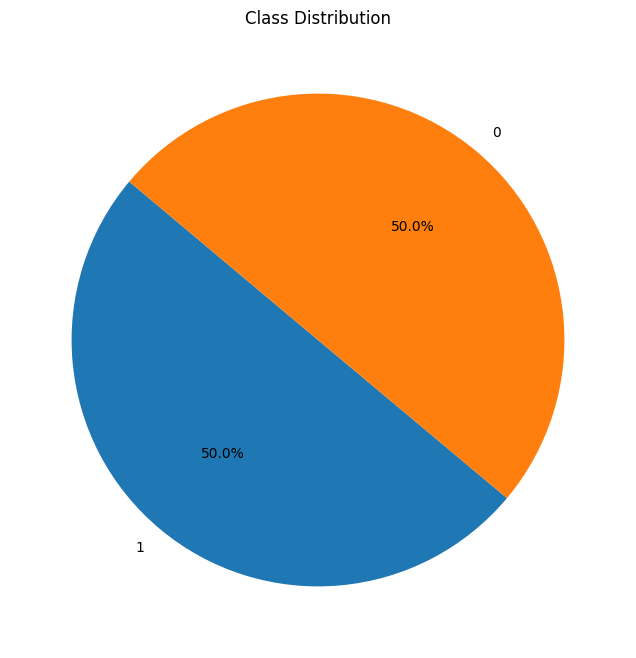

In [45]:
# Count the occurrences of each class
class_counts = result_df['ground truth'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Class Distribution')
plt.show()

In [46]:
result_df.to_csv('/content/Project_CMIL/data/final_data.csv')

In [47]:
import os
import shutil
import random

# Define the source and destination directories
source_dir = '/content/Project_CMIL/data/after_smote/non_globally_sclerotic_glomeruli'
destination_dir = '/content/Project_CMIL/data/after_augmentation/non_globally_sclerotic_glomeruli'

# Create the destination directory if it doesn't exist
if not os.path.exists(destination_dir):
    os.makedirs(destination_dir)

# List all files in the source directory
files = os.listdir(source_dir)

# Filter to include only files (in case there are subdirectories)
files = [f for f in files if os.path.isfile(os.path.join(source_dir, f))]

num_files_to_move = int(len(files))

# files_to_move = random.sample(files, num_files_to_move)

# Move the selected files to the destination directory
for file in files:
    shutil.move(os.path.join(source_dir, file), os.path.join(destination_dir, file))

print(f'Moved {num_files_to_move} files from {source_dir} to {destination_dir}')

Moved 1200 files from /content/Project_CMIL/data/after_smote/non_globally_sclerotic_glomeruli to /content/Project_CMIL/data/after_augmentation/non_globally_sclerotic_glomeruli


# **Delete Intermediate dataset**

In [49]:
import shutil
import os
directories = ['/content/Project_CMIL/data/after_smote', '/content/Project_CMIL/data/unused']
for directory in directories:
  if os.path.exists(directory):
    # Delete the directory and all its contents
    shutil.rmtree(directory)
    print(f'Directory {directory} has been deleted.')
  else:
      print(f'Directory {directory} does not exist.')

Directory /content/Project_CMIL/data/after_smote does not exist.
Directory /content/Project_CMIL/data/unused has been deleted.


Upload the ZIP file of the project in drive if you need to get the folder again to run the training notebook

# **Upload the project in Google Drive**

In [50]:

folder_path = '/content/Project_CMIL'  # Replace with the actual folder path
zip_path = '/content/Project_CMIL'  # Desired path for the zip file

shutil.make_archive(zip_path.replace('.zip', ''), 'zip', folder_path)




'/content/Project_CMIL.zip'

In [51]:
# Step 3: Move the Zip File to Google Drive
drive_path = '/content/drive/MyDrive/CMIL_assignment/'  # Replace with your desired drive path
shutil.move("/content/Project_cmil_without_smote.zip", drive_path)

print(f'Folder {folder_path} has been zipped and moved to Google Drive at {drive_path}.')

Folder /content/Project_CMIL has been zipped and moved to Google Drive at /content/drive/MyDrive/CMIL_assignment/.
